In [1]:
# Import the relevant libraries
import numpy as np # Math operations 
import matplotlib.pyplot as plt # Graphs
from mpl_toolkits.mplot3d import Axes3D # Generate 3D graphs


In [2]:
# Generate random input data 
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1)) # Uniform low high point of the interval, size=no of observations 
zs = np.random.uniform(-10, 10, (observations, 1))

# Combine two columns into a matrix using np.columns_stack - stack tuples or arrays into a 2D array
inputs = np.column_stack((xs, zs))

print(inputs.shape) # To ensure the dimension is appropriately worked 


(1000, 2)


In [3]:
# Elements in supervised learning (1 inputs, 2 weights, 3 biases, 4 outputs, 5 targets)
# targets = f(x, z) = 2^x - 3^z + 5 + noise ----> we need to work out 2, 3, 4 using DL models (5 is noise)
noise = np.random.uniform(-1, 1, (observations, 1))

targets = 2 * xs - 3 * zs + 5 + noise
print(targets.shape)

(1000, 1)


(1000, 1)
(1000,)


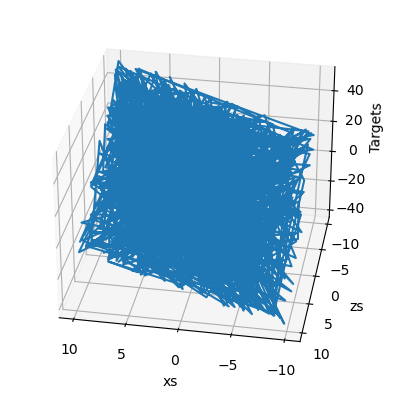

In [4]:
# Plot training data
targets = targets.reshape(observations, )
print(xs.shape)
xs = xs.reshape(observations, )
print(xs.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim = 100)
plt.show()
targets = targets.reshape(observations, 1)
xs = xs.reshape(observations, 1)
zs = zs.reshape(observations, 1)

# The example below is y = xw + b where w and b vary all the time, targets t = y so we can get w and b values
# We need an arbitrary number ranging from 0.1 to -0.1 so now we are going to initalize a variable x 
init_range = 0.1

# initial weight and biases will be picked randomly from the interval -0.1 to 0.1 
weights = np.random.uniform(-init_range, init_range, size=(2, 1)) # What does size mean? size = array with 2 rows and 3 columns
biases = np.random.uniform(-init_range, init_range, size=1) # here? size = 1 one row only 


In [5]:
print(weights)
print(biases)

[[-0.09871737]
 [ 0.07803184]]
[0.00797049]


In [6]:
# Define a learn ing rate (eta) - different learning rate affect the speed of optimization
# Too high weights may oscillate and never converge; too low model takes longer time to converge and get stuck at some points 
# If eta = 0.2; results show N/A; 0.001 show N/A as well
learning_rate = 0.01
# learning_rate = 0.2
# learning_rate = 0.00001

In [7]:
# Train the model - iteration to train 
# Game plan for each iteration: 1) calculate outputs 2) compare outputs to targets through the loss 3) print the loss 4) adjust weights and biases to reflect data 
# y = xw + b  --- multiple matrix requires dot methods 
for i in range(10000):
    
    #Y = XW + B where xw = outputs + biases
    outputs = np.dot(inputs, weights) + biases # We are reducing the dimension of the two matrices so we use dot products to do so
    deltas = outputs - targets # difference between the outputs and targets 
    
    # Calculate loss, use l2-norm loss = sum(x-x_t) ** 2
    
    loss = np.sum(deltas ** 2) / 2 / observations 
    
    print(loss)
    
    # Summation_i x_i * deltas_scaled_i 
    deltas_scaled = deltas / observations 
                                                #1000 x 2 original if we dont transpose, once transpose 2 * 1000
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases  = biases - learning_rate * np.sum(deltas_scaled)
    # Transposing does not affect the information data holds for original inputs*
    
    # Establish biases - b_i + 1 = b_i - eta summation_i * deltas_scaled_i  

246.21330856800807
117.10308846033413
59.04360796833978
32.86308715040373
20.989074250900945
15.537605559539555
12.971046472745126
11.701792137312674
11.017248017167569
10.597500561876997
10.298883797905841
10.056847990200014
9.842363294040997
9.642349440509497
9.450889479804948
9.265284571600832
9.084282249989581
8.90728064219105
8.733970980354368
8.564176975468236
8.39778262611497
8.234699760159682
8.07485343091658
7.918175337827543
7.764600854390892
7.614067678059734
7.466515209708785
7.321884261460469
7.180116912461064
7.041156431467081
6.904947229740199
6.771434827824536
6.640565828810333
6.512287894750932
6.386549724728177
6.263301033884129
6.14249253310764
6.024075909231056
5.908003805667659
5.7942298034544075
5.682708402679886
5.5733950042844285
5.466245892222575
5.361218215979603
5.25826997343463
5.157359994063188
5.058447922472443
4.961494202262456
4.866460060206967
4.773307490747408
4.681999240793921
4.592498794827285
4.504770360295823
4.41877885330143
4.3344898845690105
4.2

0.16152631216034044
0.161526310972676
0.16152630980852603
0.16152630866742493
0.16152630754891642
0.16152630645255317
0.16152630537789667
0.16152630432451726
0.16152630329199358
0.16152630227991277
0.16152630128787007
0.16152630031546875
0.16152629936231985
0.16152629842804225
0.16152629751226238
0.16152629661461396
0.16152629573473798
0.1615262948722826
0.16152629402690286
0.16152629319826073
0.16152629238602487
0.16152629158987036
0.16152629080947883
0.16152629004453822
0.1615262892947426
0.1615262885597921
0.16152628783939282
0.16152628713325667
0.16152628644110123
0.16152628576264988
0.16152628509763092
0.16152628444577866
0.1615262838068324
0.16152628318053647
0.16152628256664064
0.1615262819648993
0.16152628137507172
0.16152628079692208
0.16152628023021914
0.16152627967473643
0.16152627913025158
0.16152627859654695
0.16152627807340914
0.16152627756062882
0.16152627705800102
0.1615262765653247
0.16152627608240283
0.16152627560904226
0.16152627514505377
0.16152627469025174
0.161526

0.16152625217399097
0.16152625217399097
0.161526252173991
0.161526252173991
0.16152625217399097
0.16152625217399105
0.16152625217399097
0.161526252173991
0.16152625217399094
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625217399094
0.16152625217399091
0.161526252173991
0.161526252173991
0.16152625217399097
0.16152625217399097
0.161526252173991
0.16152625217399094
0.161526252173991
0.16152625217399091
0.16152625217399094
0.161526252173991
0.161526252173991
0.16152625217399094
0.16152625217399094
0.16152625217399097
0.16152625217399097
0.16152625217399105
0.161526252173991
0.16152625217399097
0.161526252173991
0.161526252173991
0.16152625217399097
0.16152625217399094
0.16152625217399091
0.161526252173991
0.161526252173991
0.16152625217399094
0.16152625217399097
0.161526252173991
0.161526252173991
0.16152625217399094
0.161526252173991
0.16152625217399097
0.16152625217399097
0.16152625217399097
0.161526252173991
0.161526252173991
0.16152625217399097
0.16152625217399097
0.16

0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625

0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625

0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625

0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625

0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.161526252173991
0.16152625

In [8]:
# Now print weights and biases to check whether or not weights and biases close to the function weights
print(weights, biases)

# play around 1) no. of observations, 2) learning rate, 3) no. iterations, 4) initial range for initializing weights and biases

[[ 1.99946185]
 [-3.00567311]] [5.00306771]
